In [1]:
import pandas as pd
import pandas_datareader as pdr

In [13]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
#plt.rcParams['font.family'] = 'serif'
plt.rcParams['figure.figsize'] = (15,12)

In [33]:
df = pdr.DataReader('GOOG', 'yahoo', start='2019-09-10', end='2021-08-17')

In [34]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-08-11,2776.955078,2747.000000,2765.659912,2753.790039,760200,2753.790039
2021-08-12,2768.360107,2735.580078,2754.260010,2767.790039,732300,2767.790039
2021-08-13,2773.479980,2760.100098,2767.149902,2768.120117,628600,2768.120117
2021-08-16,2779.810059,2723.314941,2760.000000,2778.320068,902000,2778.320068
2021-08-17,2774.370117,2736.419922,2763.820068,2746.010010,1063701,2746.010010


<AxesSubplot:xlabel='Date'>

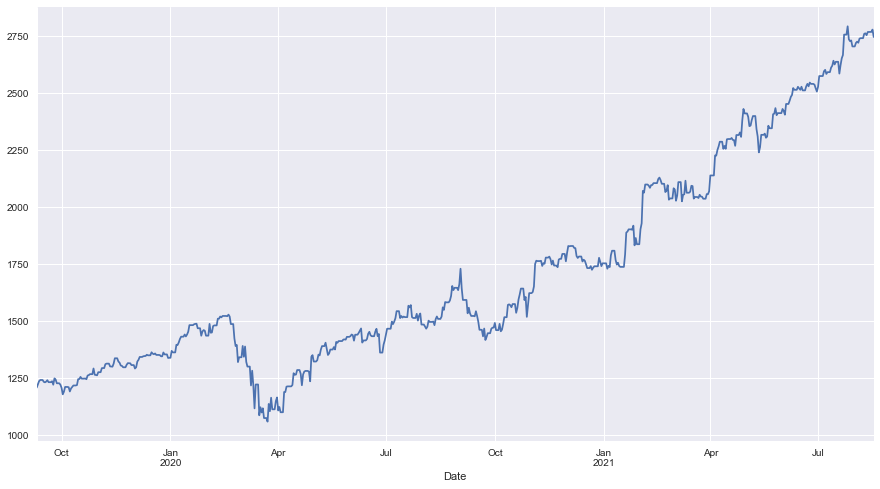

In [63]:
df['Adj Close'].plot(figsize=(15,8))

In [115]:
HOUUS = pdr.DataReader('ticker=HOUUS','econdb')

In [119]:
pdf_vals = pd.DataFrame(HOUUS['traditional','purchase-only','sa'].values)
pdf_Date = pd.DataFrame(HOUUS['traditional','purchase-only','sa'].index)

pdf_House = pd.concat([pdf_Date,pdf_vals],axis=1)
pdf_House.columns = ['Date','US_House_Index']

pdf_House.index = pdf_House['Date']
pdf_House.drop(columns='Date',inplace=True)

In [120]:
pdf_House.head()

,US_House_Index
Date,
2016-09-01,232.8
2016-10-01,233.9
2016-11-01,235.1
2016-12-01,236.5
2017-01-01,236.4


In [121]:
pdf_House = pdf_House.resample('m').ffill()

In [122]:
from statsmodels.tsa.seasonal import seasonal_decompose

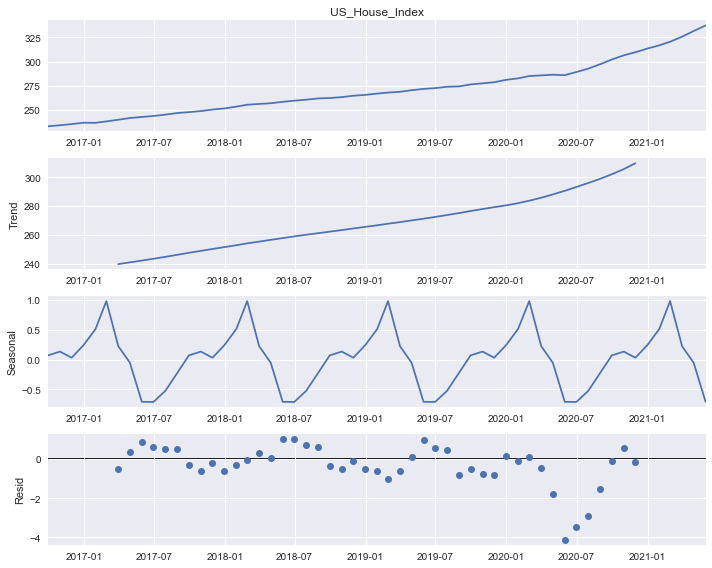

In [123]:
res = seasonal_decompose(pdf_House['US_House_Index'], model='additive')
plt.rcParams['figure.figsize'] = (10, 8)
x = res.plot()

In [125]:
#Housing_non_seasonal = pd.read_excel('https://www.fhfa.gov/DataTools/Downloads/Documents/HPI/HPI_PO_monthly_nsa.xls',skiprows=4)
#Housing_non_seasonal = Housing_non_seasonal.dropna()
#Housing_non_seasonal = Housing_non_seasonal[15:]

In [55]:
# import datetime

# start = datetime.datetime(2015, 1, 1)
# end = datetime.datetime(2021, 7, 31)
# gdp = pdr.data.DataReader('GDP', 'fred', start, end)
# gdp.plot(figsize=(17,8))

In [54]:
# res = seasonal_decompose(gdp['GDP'], model='multiplicative')
# plt.rcParams['figure.figsize'] = (10, 8)
# x = res.plot()

In [49]:
df = df.resample('d').ffill()

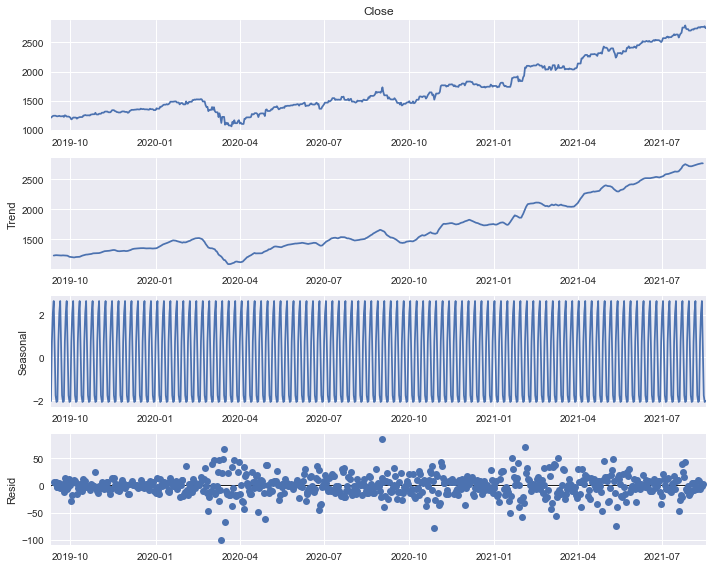

In [52]:
res = seasonal_decompose(df['Close'], model='additive')
plt.rcParams['figure.figsize'] = (10, 8)
x = res.plot()

In [83]:
#USH = pd.read_csv('https://www.fhfa.gov/DataTools/Downloads/Documents/HPI/HPI_AT_us_and_census.csv', header=None)

In [126]:
#USH[0].unique()

In [127]:
#housing_index = USH[USH[0]=='USA']

In [128]:
#dates = pd.date_range(start='1/1/1975',end='2/1/2021',freq='3M')

In [129]:
#ousing_index.index = dates

In [130]:
#housing_index.columns = ['Sector','Year','Quarter','Index']

In [131]:
#housing_index.index

In [132]:
# res = seasonal_decompose(housing_index['Index'], model='additive',period=12)
# plt.rcParams['figure.figsize'] = (10, 8)
# x = res.plot()